Data cleaning & preprocessing

Import libraries

In [71]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt

#supress warnings related to libraries
import warnings
warnings.filterwarnings("ignore")

Read the Data from CSV file in Visual Studio Code (VSC)

In [72]:
df =pd.read_csv("/workspaces/SDS-009-ds-salary-pred/data/salaries.csv", skipinitialspace=True)
#General structure of DS
df.info()
#check if there are any null or missing values
print(df.isna().sum())
# %% of DS
#print(df.isna().sum()/len(df)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB
Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64


Drop duplicates

In [73]:
df = df.drop_duplicates()

Strip before and after Whitespaces from entire data frame records

In [74]:
#Remove leading and following spaces in data
# #strip to all rows
df =df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

#strip to all columns
df.columns = df.columns.str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


Restore Location for NaN values 

In [75]:
df['Location'] =  df.groupby('Company')['Location'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [76]:
#here we group by 'Company' then apply function
df['Location'] =  df.groupby('Company')['Location'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df = df.dropna(subset=['Location'])

df.info()

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 0 to 867
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        860 non-null    object 
 1   Company Score  782 non-null    float64
 2   Job Title      860 non-null    object 
 3   Location       860 non-null    object 
 4   Date           860 non-null    object 
 5   Salary         757 non-null    object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
Company            0
Company Score     78
Job Title          0
Location           0
Date               0
Salary           103
dtype: int64


Unfold Salary column

In [77]:
df['MIN'] = df['Salary'].str.extract('(\d{1,4})')
df['MAX'] = df['Salary'].str.extract('(.-.\$\d{1,4}K)')
df['MAX'] = df['MAX'].str.extract('(\d{1,4})')
df['Hourly'] = df['Salary'].str.extract('(Per Hour)')
df['Source'] = df['Salary'].str.extract('(\([a-zA-Z]+)')
df['Source'] = df['Source'].str.extract('([a-zA-Z]+)')
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
433,Vertex Professional Service LLC,2.7,Senior Software Engineer (Typescript/Go),"Boston, MA",2d,$130K - $158K (Glassdoor est.),130,158,NaN,Glassdoor
35,Principal Financial Group,4.1,Experienced Software Engineer,"Des Moines, IA",2d,$51K - $78K (Glassdoor est.),51,78,NaN,Glassdoor
759,OpenAI,3.1,Apprentice ETL Software Engineer,"Elkridge, MD",30d+,$160K - $385K (Employer est.),160,385,NaN,Employer
335,"ICR, Inc.",4.2,Software Engineer,"Carol Stream, IL",5d,$90K - $180K (Employer est.),90,180,NaN,Employer
682,CVS Health,3.0,"Frontend Software Engineer Graduate, TikTok In...","San Jose, CA",10d,$69K - $120K (Glassdoor est.),69,120,NaN,Glassdoor
...,...,...,...,...,...,...,...,...,...,...
589,"Vizient, Inc.",4.5,Software Engineer,"Annapolis Junction, MD",30d+,$119K - $142K (Employer est.),119,142,NaN,Employer
215,Blue Origin,4.4,Embedded Flight Software Engineer – New Glenn,"Seattle, WA",2d,$189K - $284K (Employer est.),189,284,NaN,Employer
255,Pressco Technology,4.5,API Services - Senior Software Engineer - Java...,"Buffalo, NY",10d,$79K - $159K (Employer est.),79,159,NaN,Employer
270,Red Ventures,3.1,Autonomy Software Engineer,"Ann Arbor, MI",2d,$108K - $151K (Glassdoor est.),108,151,NaN,Glassdoor


Drop NaN Salaries

In [78]:
df = df[df['MIN'].notna()]
df['MAX'].fillna(df['MIN'],inplace=True)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
328,Bayer,2.3,Application Programmer Analyst/Developer I,"Fort Collins, CO",5d,$97K - $129K (Glassdoor est.),97,129,NaN,Glassdoor
256,YouTube,3.8,Software Integration & Test Engineer,"Solon, OH",3d,$132K - $190K (Glassdoor est.),132,190,NaN,Glassdoor
238,NationMind Infoservices Pvt Ltd,3.6,Software Engineer,Florida,16d,$53K - $103K (Employer est.),53,103,NaN,Employer
437,Infosys,3.8,"Full Stack Engineer, Leverage Engineering","San Francisco, CA",6d,$130K - $165K (Employer est.),130,165,NaN,Employer
743,Teradyne,3.6,Software Engineer (Onsite),"Columbia, MD",25d,$248K - $385K (Employer est.),248,385,NaN,Employer
...,...,...,...,...,...,...,...,...,...,...
384,"Garmin International, Inc.",3.7,Experienced Software Engineer - Scaled Access,"New York, NY",30d+,$70K - $96K (Glassdoor est.),70,96,NaN,Glassdoor
193,Two Six Technologies,2.7,Software Engineer,"Tysons Corner, VA",17d,$100K - $165K (Employer est.),100,165,NaN,Employer
400,Fetch Package,4.8,Software Engineer (Oracle Database Expertise),"Bridgewater, NJ",4d,$101K - $144K (Glassdoor est.),101,144,NaN,Glassdoor
91,"Stefanini, Inc",3.8,AWS Cloud Engineer,"Richmond, VA",1d,$96K - $117K (Employer est.),96,117,NaN,Employer


Mark Per hour salaries

In [79]:
df['Hourly']=df['Hourly'].fillna(0)
df['Hourly']=df['Hourly'].replace(["Per Hour"],1)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
673,Delta Dental Ins.,4.3,Senior Software Engineer,Whitehall Township,11d,$125K - $160K (Employer est.),125,160,0,Employer
278,Uber,3.8,Senior Software Engineer,"Santa Barbara, CA",5d,$97K - $197K (Employer est.),97,197,0,Employer
755,CyberKorp,4.2,Software Developer in Test,"Hercules, CA",10d,$80K - $119K (Employer est.),80,119,0,Employer
525,DaqScribe Solutions,4.7,Software Engineer - C/C++,"San Jose, CA",10d,$95K - $170K (Employer est.),95,170,0,Employer
203,"CARECRAFT, INC",3.7,Software Engineer,"Carlsbad, CA",10d,$125K - $178K (Employer est.),125,178,0,Employer
...,...,...,...,...,...,...,...,...,...,...
180,f5,3.8,Principal Software Engineer,"Seattle, WA",4d,$82K - $102K (Employer est.),82,102,0,Employer
226,The Swift Group,3.7,Software Engineer,"McLean, VA",18d,$80K - $150K (Employer est.),80,150,0,Employer
395,Software Productivity Strategists,3.3,Sr. Full Stack Software Engineer,"Greenwood Village, CO",3d,$130K - $270K (Employer est.),130,270,0,Employer
165,Lynker Corporation,3.9,Software Engineer,"Stennis Space Center, MS",30d+,$78K - $129K (Employer est.),78,129,0,Employer


Check the Data Set after cleaning

In [80]:
#General structure of DS
# df.info()
# df=df['Company'].to_string
#check if there are any null or missing values
# print(df.isna().sum())
# %% of DS
#print(df.isna().sum()/len(df)*100)
df['Company'] = df['Company'].astype(str)
df['MIN'] = df['MIN'].astype(float)
df['MAX'] = df['MAX'].astype(float)
df['Hourly'] = df['Hourly'].astype(int)
df['Source'] = df['Source'].astype(str)



# df.info()
print(df.dtypes)

print(df.isna().sum())

Company           object
Company Score    float64
Job Title         object
Location          object
Date              object
Salary            object
MIN              float64
MAX              float64
Hourly             int64
Source            object
dtype: object
Company          0
Company Score    0
Job Title        0
Location         0
Date             0
Salary           0
MIN              0
MAX              0
Hourly           0
Source           0
dtype: int64


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 763
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        757 non-null    object 
 1   Company Score  757 non-null    float64
 2   Job Title      757 non-null    object 
 3   Location       757 non-null    object 
 4   Date           757 non-null    object 
 5   Salary         757 non-null    object 
 6   MIN            757 non-null    float64
 7   MAX            757 non-null    float64
 8   Hourly         757 non-null    int64  
 9   Source         757 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 65.1+ KB


Feature Selection
- Chi-squared test
- correlation coefficient scores
- LASSO
- Ridge regression

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
def categorize_job_title(title):
    title = title.lower()  # Convert to lowercase for consistency
    if 'backend' in title or 'frontend' in title or 'software engineer' in title:
        return 'Software Engineer'
    elif 'developer' in title or 'development' in title:
        return 'Developer'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'machine learning' in title or 'ai' in title or 'ml' in title:
        return 'Machine Learning/AI Engineer'
    elif 'devops' in title:
        return 'DevOps Engineer'
    elif 'full stack' in title:
        return 'Full Stack Developer'
    elif 'test' in title or 'quality' in title: 
        return 'QA Engineer'
    else:
        return 'Other IT Jobs'
    

df['Job Category'] = df['Job Title'].apply(categorize_job_title)

print(df)



                           Company  Company Score  \
0                         ViewSoft            4.8   
1                          Workiva            4.3   
2       Garmin International, Inc.            3.9   
3                         Snapchat            3.5   
4    Vitesco Technologies Group AG            3.1   
..                             ...            ...   
759                         OpenAI            3.1   
760                     NCR Atleos            3.9   
761  Electronic Warfare Associates            3.8   
762                   BillGO, Inc.            3.3   
763                        Genesys            3.6   

                                             Job Title           Location  \
0                                    Software Engineer       Manassas, VA   
1                            Software Support Engineer             Remote   
2                                 C# Software Engineer           Cary, NC   
3    Software Engineer, Fullstack, 1+ Years of Expe... 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Other IT Jobs'),
  Text(2, 0, 'Developer'),
  Text(3, 0, 'QA Engineer'),
  Text(4, 0, 'DevOps Engineer'),
  Text(5, 0, 'Machine Learning/AI Engineer'),
  Text(6, 0, 'Full Stack Developer')])

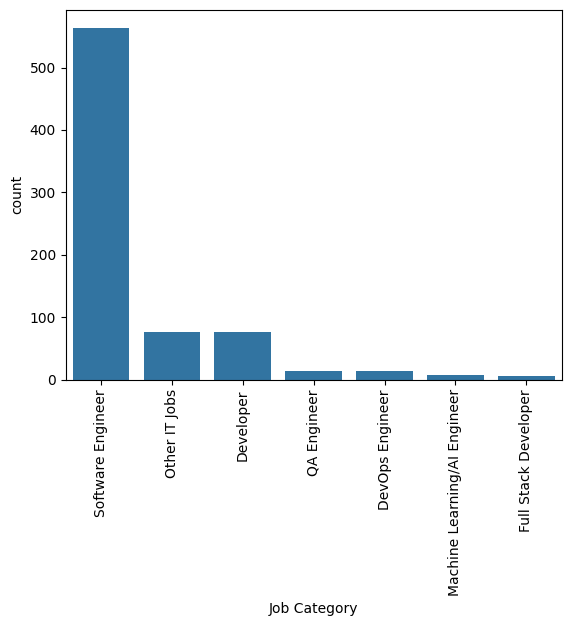

In [99]:
sns.countplot(x='Job Category', data=df)
plt.xticks(rotation = 90)

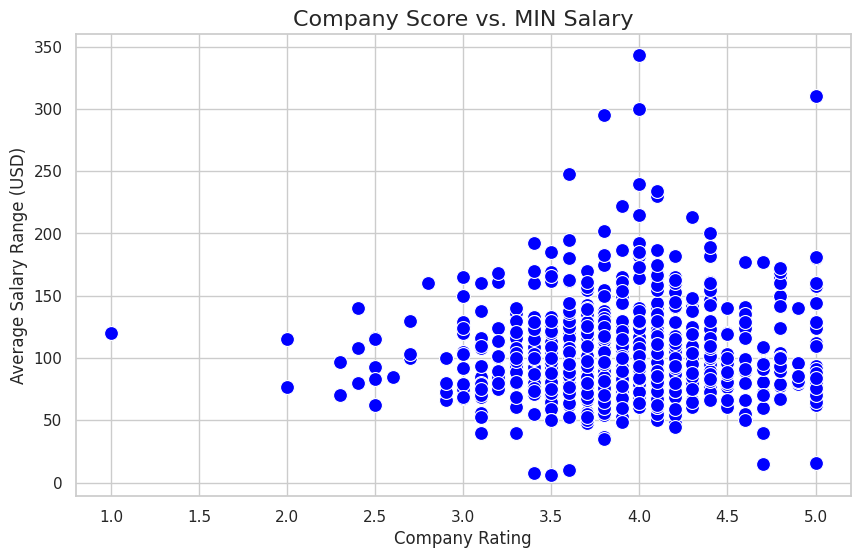

In [100]:
# Set the plot style
sns.set(style="whitegrid")

# Create a scatter plot of Rating vs. Salary Range
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company Score', y='MIN', data=df, s=100, color='blue')

# Add titles and labels
plt.title('Company Score vs. MIN Salary', fontsize=16)
plt.xlabel('Company Score', fontsize=12)
plt.ylabel('Average Salary Range (USD)', fontsize=12)

# Show plot
plt.show()

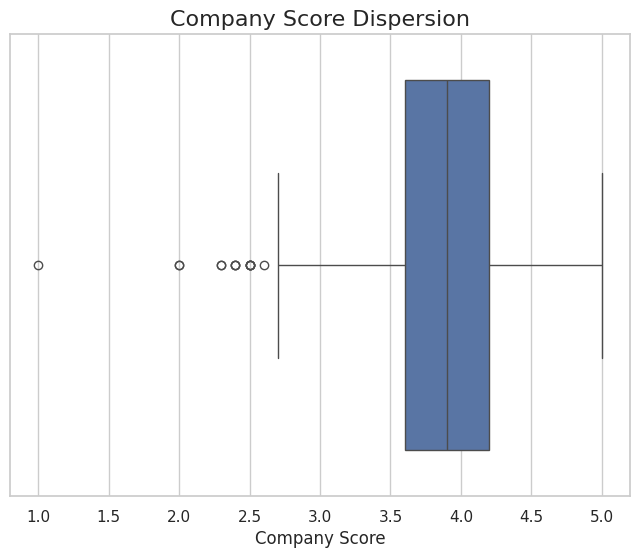

In [101]:
# Set the plot style
sns.set(style="whitegrid")

# Create a box plot for the distribution of company ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Company Score'])

# Add titles and labels
plt.title('Company Score Dispersion', fontsize=16)
plt.xlabel('Company Score', fontsize=12)

# Show plot
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '2.3'),
  Text(3, 0, '2.4'),
  Text(4, 0, '2.5'),
  Text(5, 0, '2.6'),
  Text(6, 0, '2.7'),
  Text(7, 0, '2.8'),
  Text(8, 0, '2.9'),
  Text(9, 0, '3.0'),
  Text(10, 0, '3.1'),
  Text(11, 0, '3.2'),
  Text(12, 0, '3.3'),
  Text(13, 0, '3.4'),
  Text(14, 0, '3.5'),
  Text(15, 0, '3.6'),
  Text(16, 0, '3.7'),
  Text(17, 0, '3.8'),
  Text(18, 0, '3.9'),
  Text(19, 0, '4.0'),
  Text(20, 0, '4.1'),
  Text(21, 0, '4.2'),
  Text(22, 0, '4.3'),
  Text(23, 0, '4.4'),
  Text(24, 0, '4.5'),
  Text(25, 0, '4.6'),
  Text(26, 0, '4.7'),
  Text(27, 0, '4.8'),
  Text(28, 0, '4.9'),
  Text(29, 0, '5.0')])

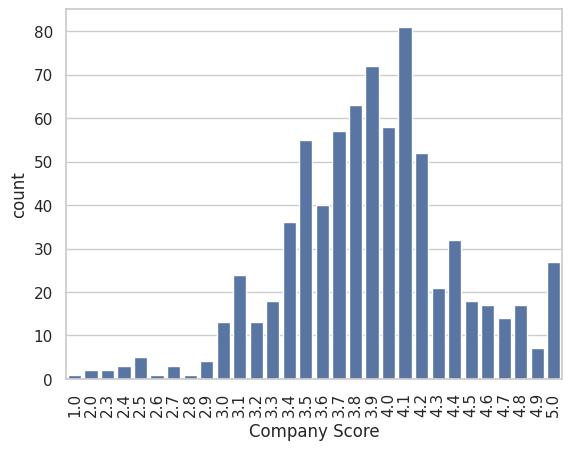

In [105]:
sns.countplot(x='Company Score', data=df)
plt.xticks(rotation = 90)